In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
#from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import pandas as pd
import pickle
import csv


#pickle_file = open("RQ3_Input_Dataset2",'rb')
##--LDA File
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df
##--Sentiment file
##FINAL_Dataset1_Pickle.data 
##FINAL_Dataset2_Pickle.data
##RQ3_Input_Dataset1.data
##RQ3_Input_Dataset2.data

df = pd.read_pickle("RQ3_Input_Dataset2.data")

In [2]:
df.head()

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,featureSentiScoreBool,featureSentiScorenormalized,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value
1,Instone Real Estate Group AG,Immobilien,May 2020,3,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Empfohlen,Overall,4.5,Wenn Transparenz und Wertschätzung aufeinande...,...,1.0,0.345304,0.90,1.0,1.0,4.7,1.0,4.7,0.8,4.700000
2,Instone Real Estate Group AG,Immobilien,October 2019,4,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Personal / Aus- und Weiterbildu...,Nicht empfohlen,Overall,3.2,Anspruch und Wirklichkeit klaffen auseinander...,...,1.0,0.028910,0.64,0.6,0.6,0.6,0.8,0.4,0.6,3.028571
3,Instone Real Estate Group AG,Immobilien,October 2019,5,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung bei Instone Re...,Empfohlen,Overall,4.8,Toller Arbeitgeber Tolle Truppe Auch bei lä...,...,1.0,0.012521,0.96,1.0,1.0,1.0,1.0,1.0,0.8,4.828571
4,Instone Real Estate Group AG,Immobilien,September 2019,6,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Bes...,Empfohlen,Overall,4.6,Glücksfall - vom Konzern zum Mittelstand! Ang...,...,1.0,0.314862,0.92,1.0,0.8,0.8,1.0,1.0,1.0,4.657143
5,Instone Real Estate Group AG,Immobilien,August 2019,8,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung bei Instone Re...,Empfohlen,Overall,4.5,100% Zufriedenheit Neue sinnvolle Wege zum Zi...,...,1.0,0.076449,0.90,1.0,1.0,0.8,1.0,0.6,1.0,4.500000


In [3]:
df.OrgSector.unique()

array(['Immobilien', 'Elektro/Elektronik', 'Sonstige Branchen',
       'Maschinenbau', 'Handel', 'Internet', 'Medizin/Pharma', 'IT',
       'Automobil', 'Industrie', 'Dienstleistung', 'Energie',
       'Marketing/Werbung/PR', 'Nahrungsmittel/Landwirtschaft', 'Chemie',
       'Finanz', 'Banken', 'Transport/Verkehr/Logistik',
       'Telekommunikation', 'Bau/Architektur', 'Versicherung',
       'Kunst/Kultur', 'Textil', ' Immobilien', 'Medien',
       'Personalwesen & -beschaffung', ' Industrie', 'Sport/Beauty',
       'Druck/Verpackung', 'Medizintechnik', 'Forschung/Entwicklung',
       'Beratung/Consulting'], dtype=object)

#### Assign sectors - generic name

In [4]:
conditions = [(df["OrgSector"] == 'Immobilien'),
              (df["OrgSector"] == 'Elektro/Elektronik'),
              (df["OrgSector"] == 'Sonstige Branchen'),
              (df["OrgSector"] == 'Maschinenbau'),
              (df["OrgSector"] == 'Handel'),
              (df["OrgSector"] == 'Internet'),
              (df["OrgSector"] == 'Medizin/Pharma'),
              (df["OrgSector"] == 'IT'),
              (df["OrgSector"] == 'Automobil'),
              (df["OrgSector"] == 'Industrie'),
              (df["OrgSector"] == 'Dienstleistung'),
              (df["OrgSector"] == 'Energie'),
              (df["OrgSector"] == 'Marketing/Werbung/PR'),
              (df["OrgSector"] == 'Nahrungsmittel/Landwirtschaft'),              
              (df["OrgSector"] == 'Chemie'),
              (df["OrgSector"] == 'Finanz'),
              (df["OrgSector"] == 'Banken'),
              (df["OrgSector"] == 'Transport/Verkehr/Logistik'),
              (df["OrgSector"] == 'Telekommunikation'),
              (df["OrgSector"] == 'Bau/Architektur'),
              (df["OrgSector"] == 'Versicherung'),
              (df["OrgSector"] == 'Kunst/Kultur'),
              (df["OrgSector"] == 'Textil'),
              (df["OrgSector"] == ' Immobilien'),
              (df["OrgSector"] == 'Medien'),
              (df["OrgSector"] == 'Personalwesen & -beschaffung'),
              (df["OrgSector"] == ' Industrie'),
              (df["OrgSector"] == 'Sport/Beauty'),
              (df["OrgSector"] == 'Druck/Verpackung'),
              (df["OrgSector"] == 'Medizintechnik'),
              (df["OrgSector"] == 'Forschung/Entwicklung'),
              (df["OrgSector"] == 'Beratung/Consulting')
              ]
choices_NewOrgSector = ['Finance, Insurance, Real Estate', 'Manufacturing', 'Others', 'Manufacturing', 'Retail Trade',
                        'Services','Manufacturing','Manufacturing','Manufacturing','Manufacturing','Services',
                        'Transportation & Public Utilities','Services','Agriculture, Forestry, Fishing','Manufacturing',
                        'Finance, Insurance, Real Estate','Finance, Insurance, Real Estate','Transportation & Public Utilities',
                        'Transportation & Public Utilities','Construction','Finance, Insurance, Real Estate','Services',
                        'Manufacturing','Finance, Insurance, Real Estate','Services','Services','Manufacturing',
                        'Services','Manufacturing','Manufacturing','Services','Services']
df["NewOrgSector"] = np.select(conditions, choices_NewOrgSector, default='NaN')

In [5]:
df['NewOrgSector'].value_counts()

Manufacturing                        3704
Services                             1019
Transportation & Public Utilities     983
Finance, Insurance, Real Estate       886
Retail Trade                          365
Others                                 51
Construction                           31
Agriculture, Forestry, Fishing         23
Name: NewOrgSector, dtype: int64

#### Fragmentation of dataframe, sectorwise

In [6]:
df_Manufacturing = df[df['NewOrgSector'] == 'Manufacturing']
df_Transportation = df[df['NewOrgSector'] == 'Transportation & Public Utilities']
df_Services = df[df['NewOrgSector'] == 'Services']
df_Finance = df[df['NewOrgSector'] == 'Finance, Insurance, Real Estate']
df_Retail  = df[df['NewOrgSector'] == 'Retail Trade']
df_Others = df[df['NewOrgSector'] == 'Others']
df_Construction = df[df['NewOrgSector'] == 'Construction']
df_Agriculture = df[df['NewOrgSector'] == 'Agriculture, Forestry, Fishing']

listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#gapminder_2002 = gapminder[gapminder['year']==2002]

In [ ]:
for i in range(0, 23):
    if i in [12, 20, 22]:
        continue
    col_name = 'topic' + str(i)
    df_Manufacturing['col_name'] = df_Manufacturing[col_name]
    
df_Manufacturing['col_name']

In [ ]:
pd.set_option('display.max_columns', None)
df_Manufacturing.head()

In [7]:
noOfTopics = 0

for name in df_Manufacturing.loc[:,'topic0':'topic22']:
    if 'topic' in name:
        noOfTopics +=1

#### Convert to numpy array - input for t-test function

In [8]:
#arr = df.to_numpy()
arr_df_Manufacturing_topic0 = df_Manufacturing["topic0"].to_numpy()
arr_df_Manufacturing_topic0

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01886822])

In [9]:
#arr = df.to_numpy()

arr_df_Services_topic0 = df_Services["topic0"].to_numpy()
arr_df_Services_topic0

array([0.01204824, 0.01587305, 0.        , ..., 0.        , 0.02325588,
       0.0136987 ])

In [ ]:
# Use scipy.stats.ttest_ind_from_stats.
stats.ttest_ind(arr_df_Manufacturing_topic0, arr_df_Services_topic0)


In [16]:
# noOfTopics = 0

# for name in df_Manufacturing.loc[:,'topic0':'topic22']:
#     if 'topic' in name:
#         noOfTopics +=1
# print("no of topics ::", noOfTopics)

# for c in range(noOfTopics):
#     if c not in [12,20,22]:
#         topic_num = 'topic' + str(c)
#         arr_df_Manufacturing_topic0 = df_Manufacturing[topic_num].to_numpy()
#         arr_df_Services_topic0 = df_Services[topic_num].to_numpy()
#         # Use scipy.stats.ttest_ind_from_stats.
#         print(stats.ttest_ind(arr_df_Manufacturing_topic0, arr_df_Services_topic0))
    
    

no of topics :: 23
Ttest_indResult(statistic=3.9080338450610648, pvalue=9.435327958224059e-05)
Ttest_indResult(statistic=-3.8742380549683717, pvalue=0.00010840801821884096)
Ttest_indResult(statistic=2.2326272785732004, pvalue=0.02562024372633525)
Ttest_indResult(statistic=-1.0134568752235515, pvalue=0.31089392106705593)
Ttest_indResult(statistic=0.19434575937147197, pvalue=0.8459135197931118)
Ttest_indResult(statistic=1.6269482995467468, pvalue=0.10381481469650479)
Ttest_indResult(statistic=0.2894111773999139, pvalue=0.772279450971371)
Ttest_indResult(statistic=-0.64318061834991, pvalue=0.5201381461180563)
Ttest_indResult(statistic=2.2195326386367906, pvalue=0.026497852666979783)
Ttest_indResult(statistic=1.3353649595548758, pvalue=0.18182130720059383)
Ttest_indResult(statistic=0.9406976131959954, pvalue=0.3469079717248885)
Ttest_indResult(statistic=-1.0324888772855136, pvalue=0.30189604378457885)
Ttest_indResult(statistic=-0.7847851369498409, pvalue=0.432618933649075)
Ttest_indResult(

#### Function to assign (*) to p-values

In [10]:
def starTeller(_value):
    if _value == 0:
        return '*****'
    if _value > 0 and _value <=0.001:
        return '****'
    if _value > 0.001 and _value <=0.01:
        return '***'
    if _value > 0.01 and _value <=0.05:
        return '**'
    if _value > 0.05 and _value <=0.1:
        return '*'
    if _value > 0.1:
        return '.'

#### t-test function block, outputs data into excel and generates heatmap

no of topics :: 23
====================New CSV==================
0
====================New CSV==================
1
====================New CSV==================
2
====================New CSV==================
3
====================New CSV==================
4
====================New CSV==================
5
====================New CSV==================
6
====================New CSV==================
7
====================New CSV==================
8
====================New CSV==================
9
====================New CSV==================
10
====================New CSV==================
11
====================New CSV==================
12
====================New CSV==================
13
====================New CSV==================
14
====================New CSV==================
15
====================New CSV==================
16
====================New CSV==================
17
====================New CSV==================
18
====================New CSV==================
19
===========

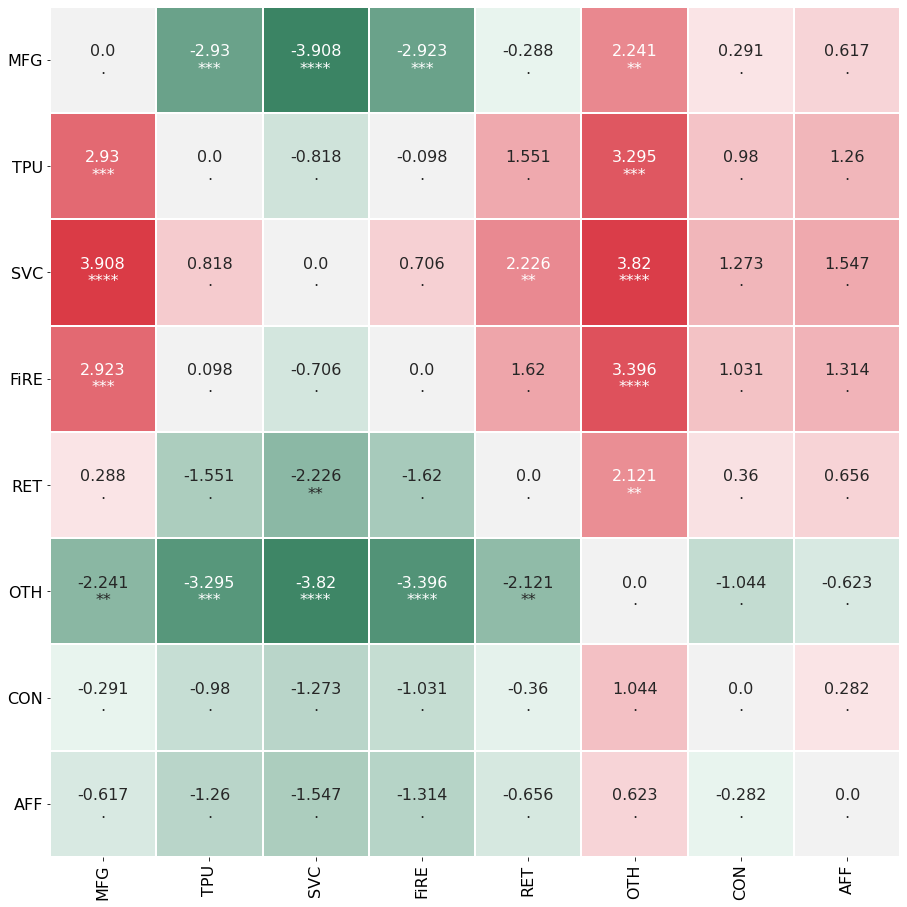

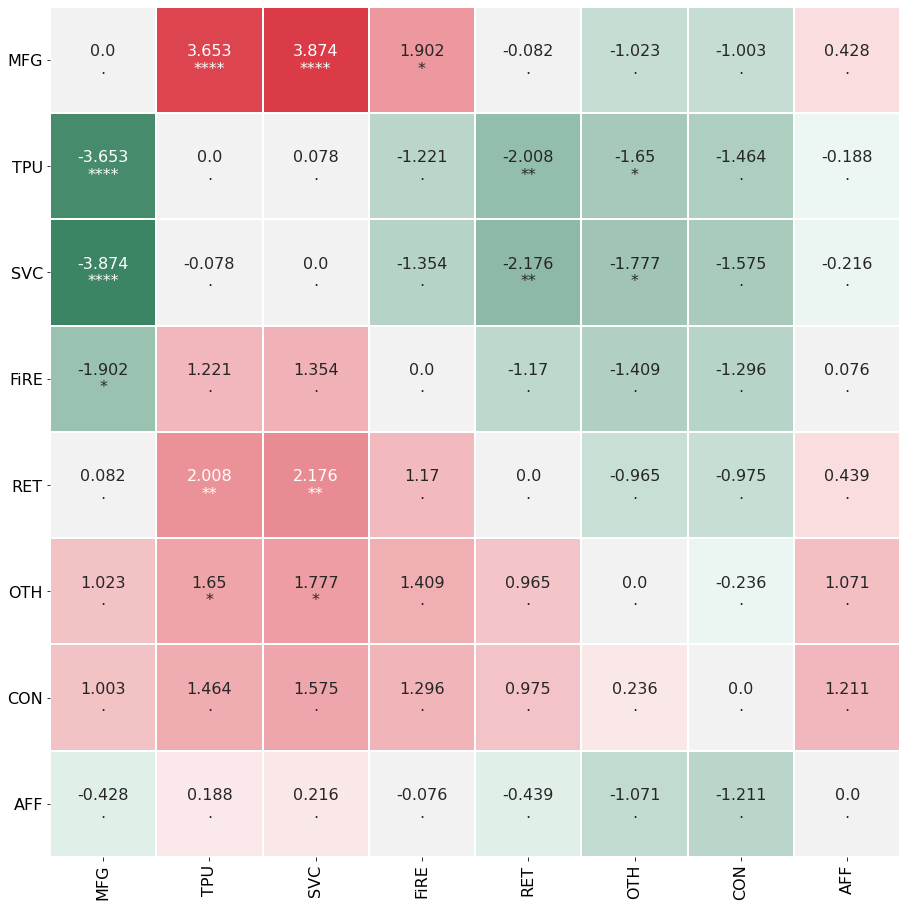

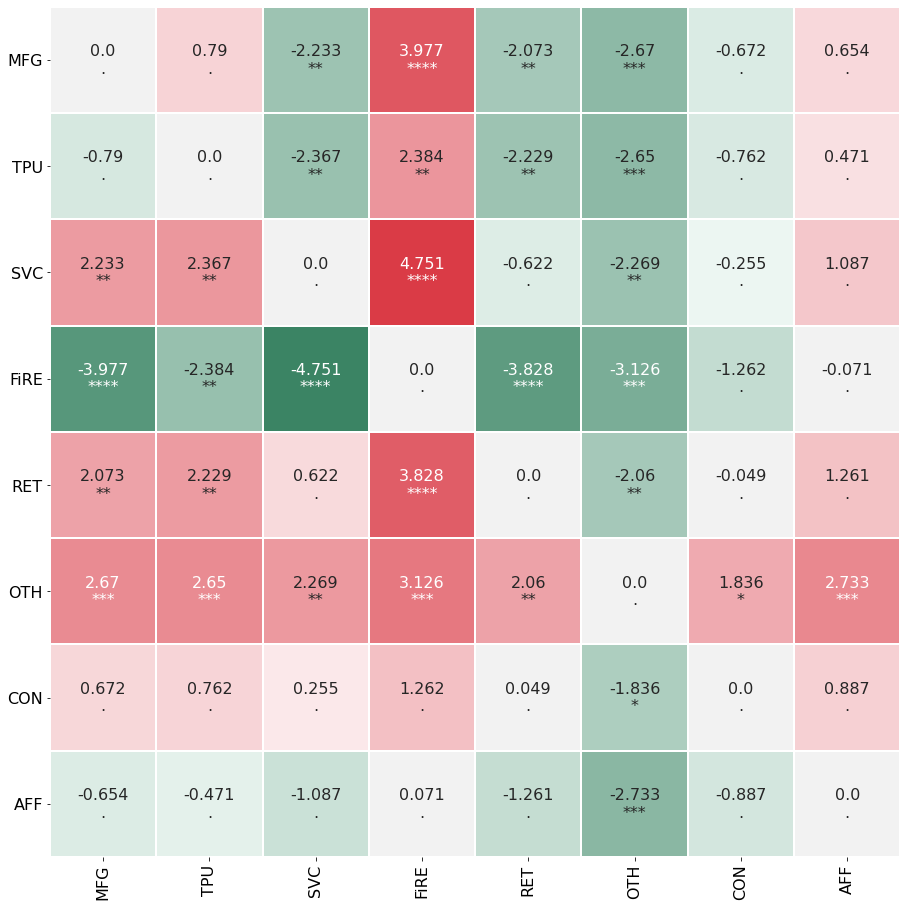

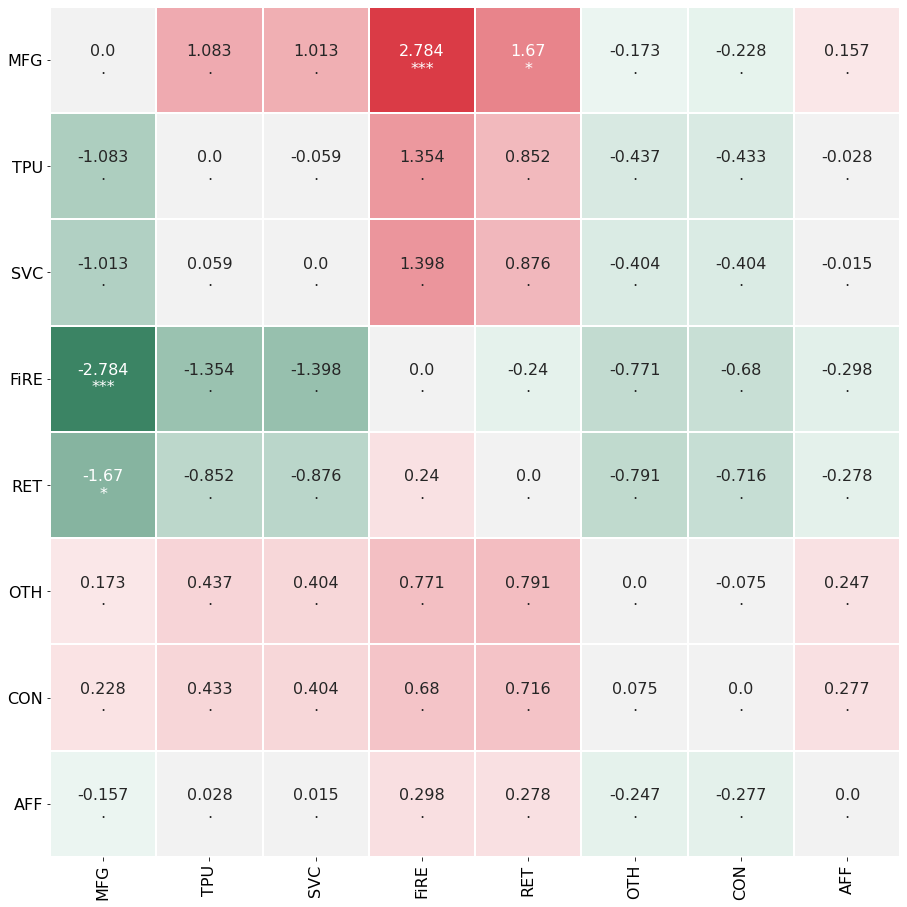

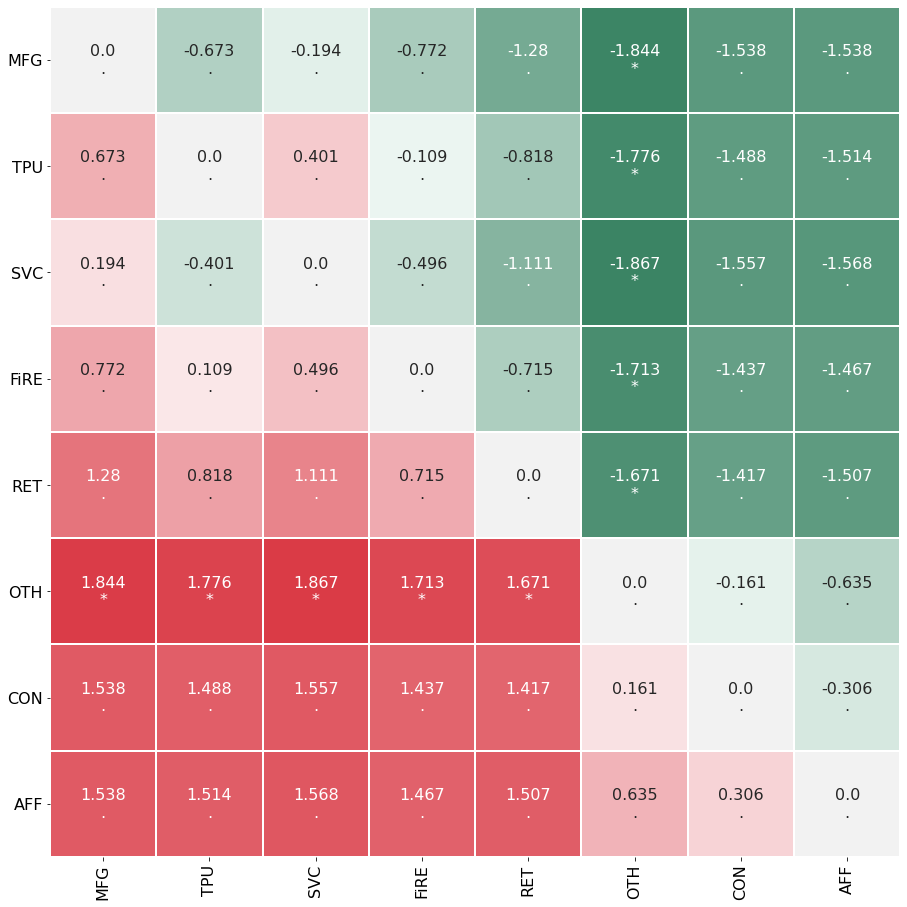

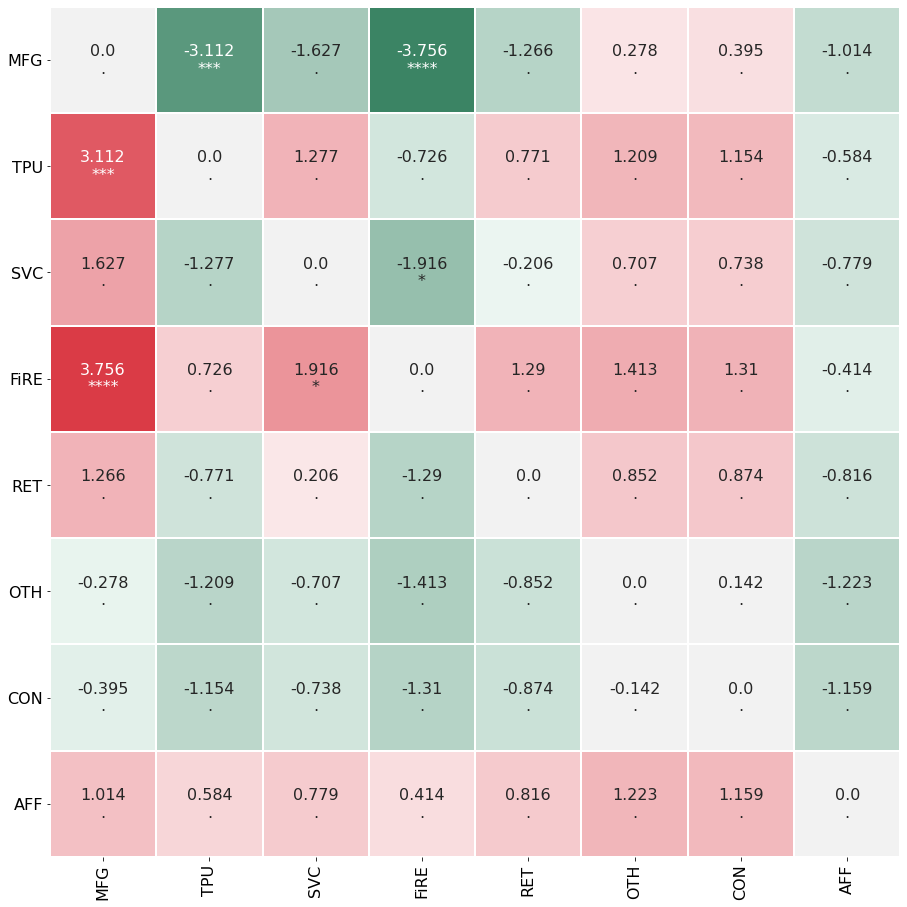

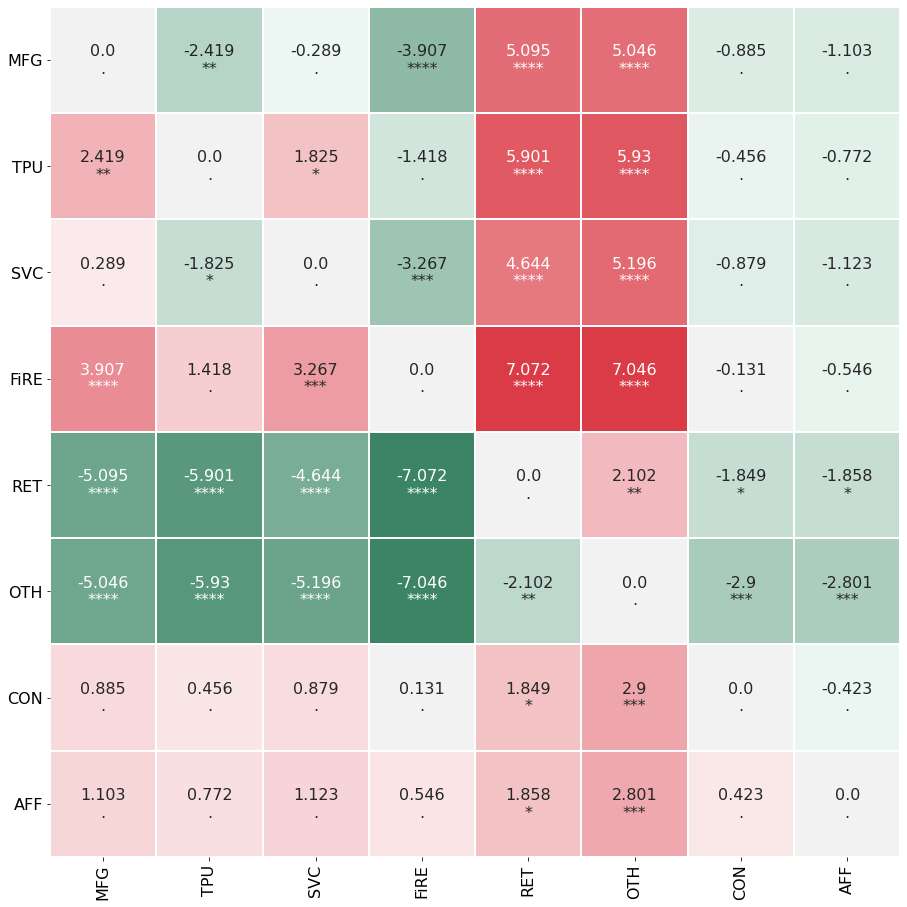

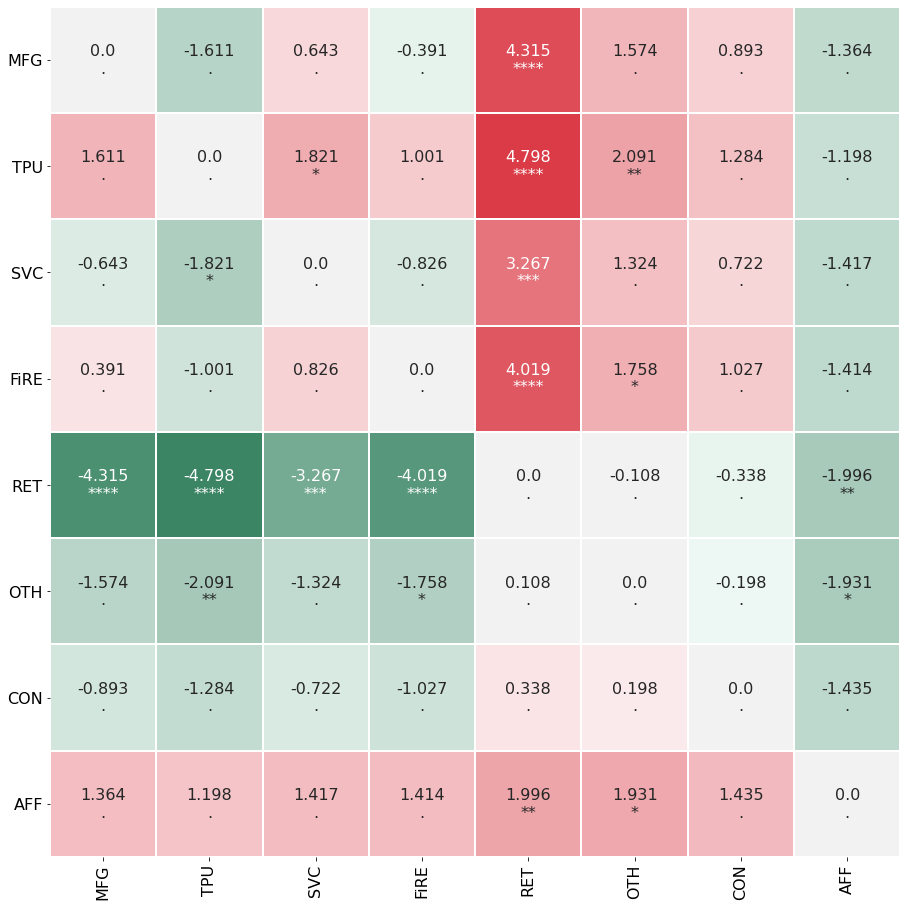

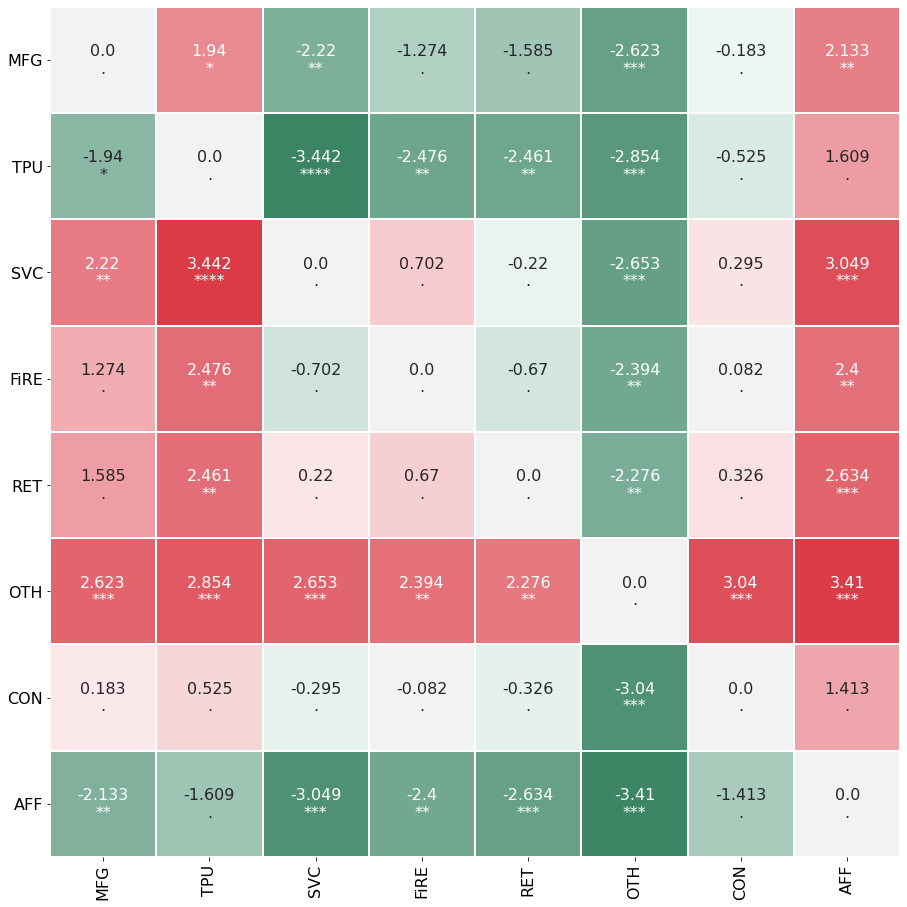

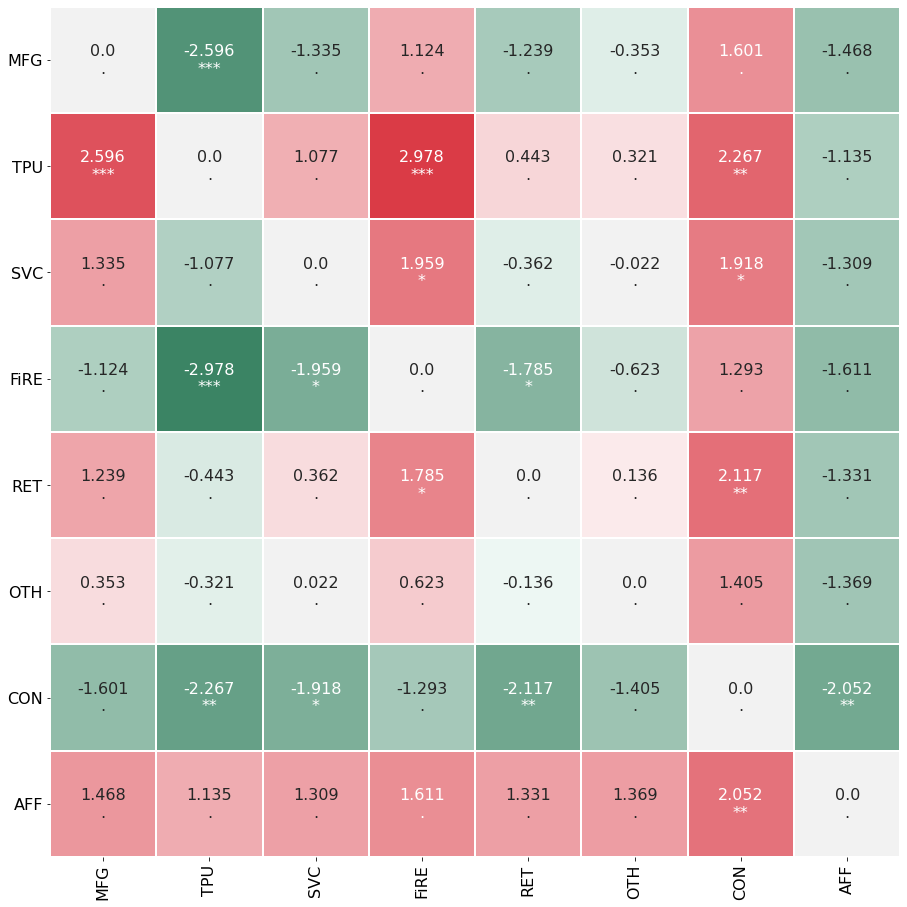

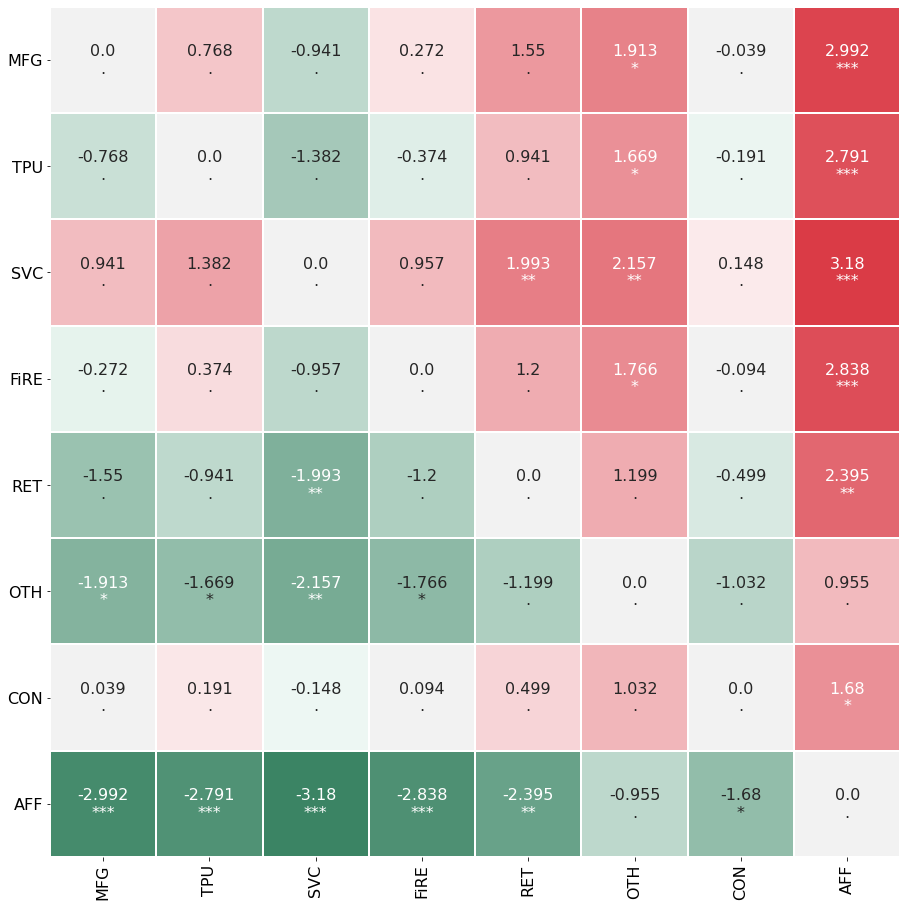

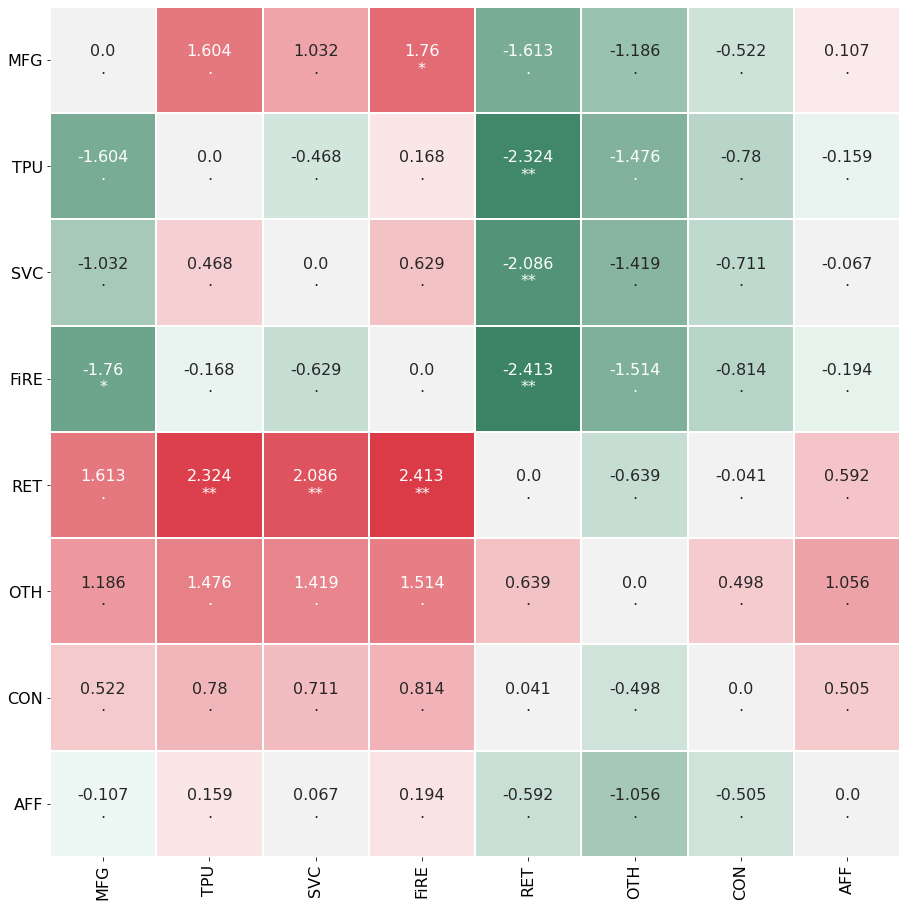

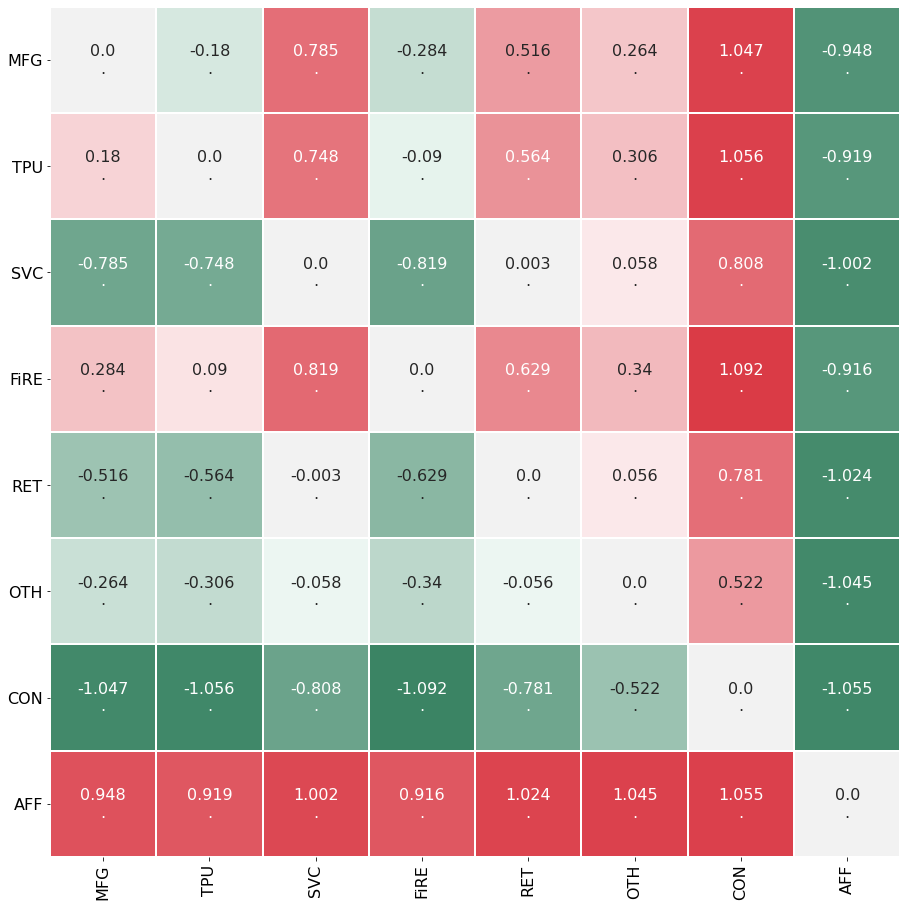

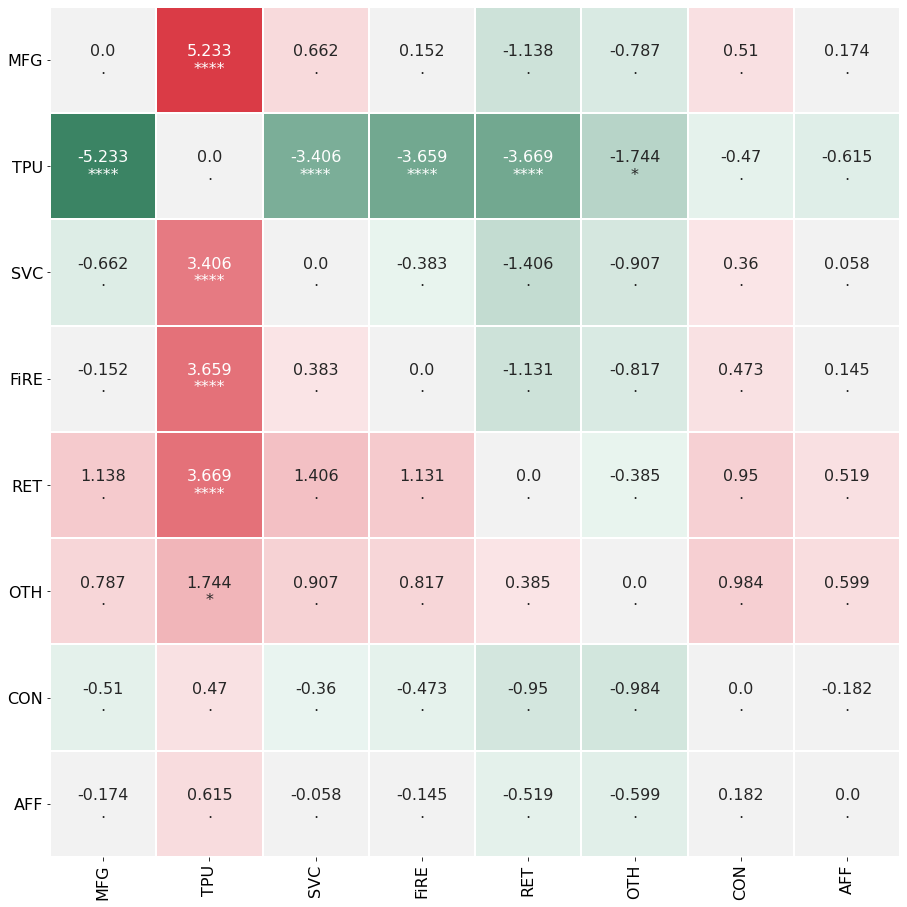

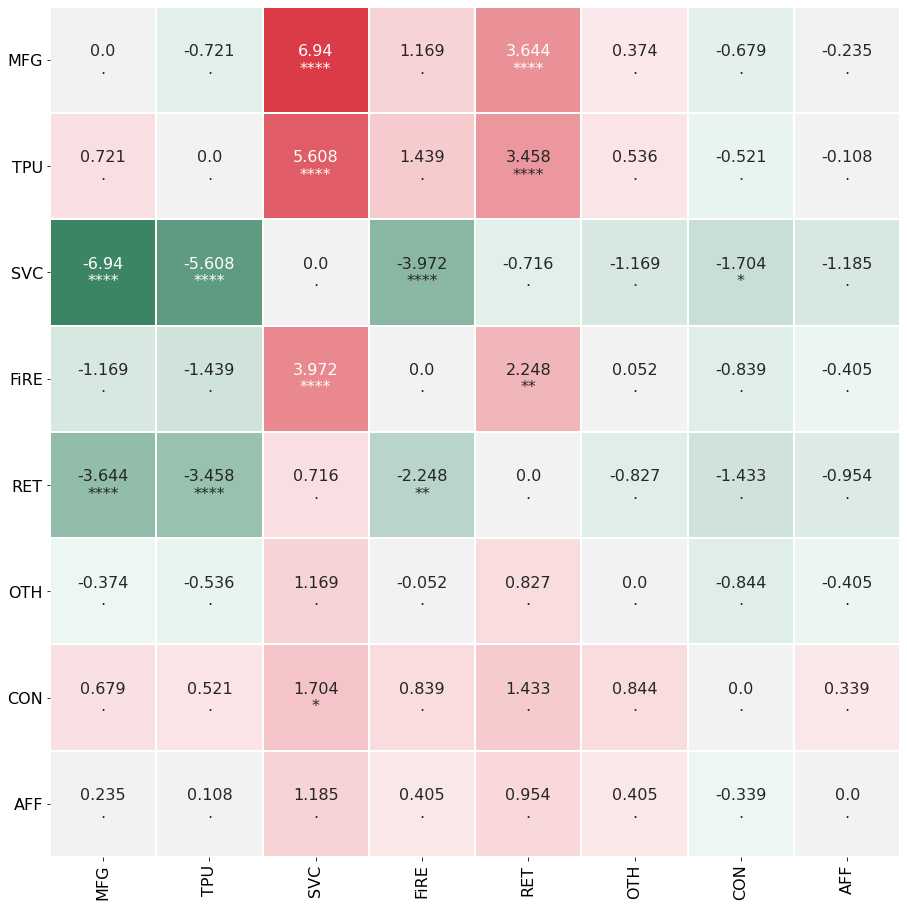

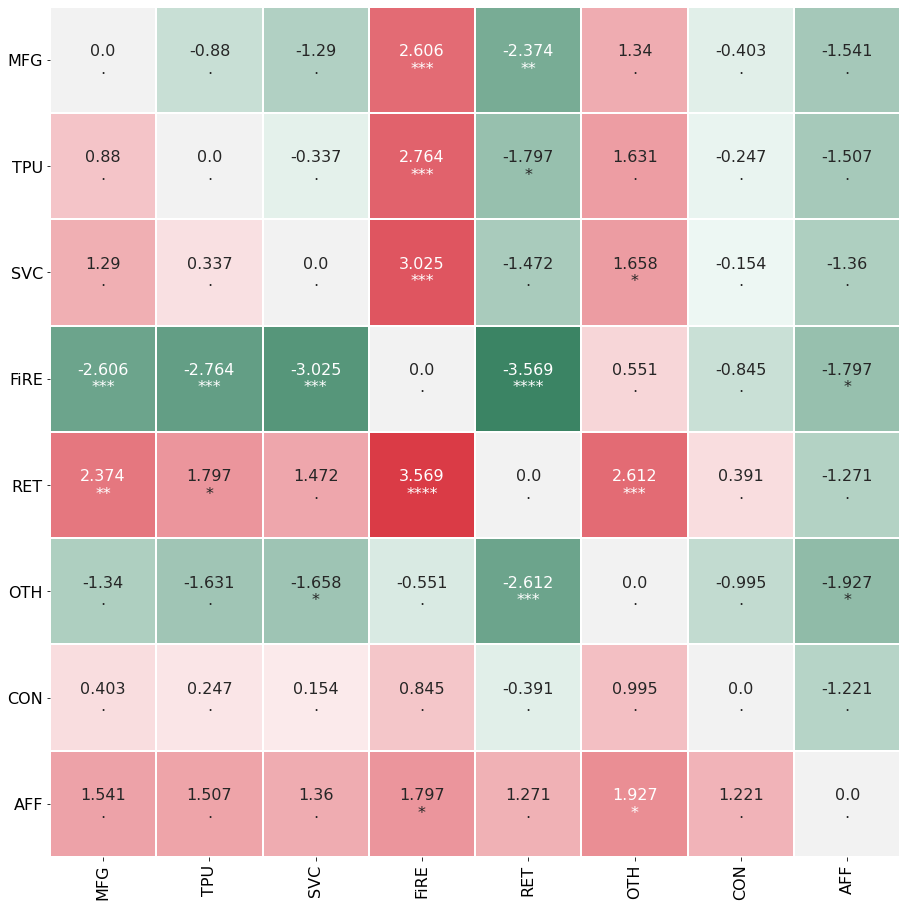

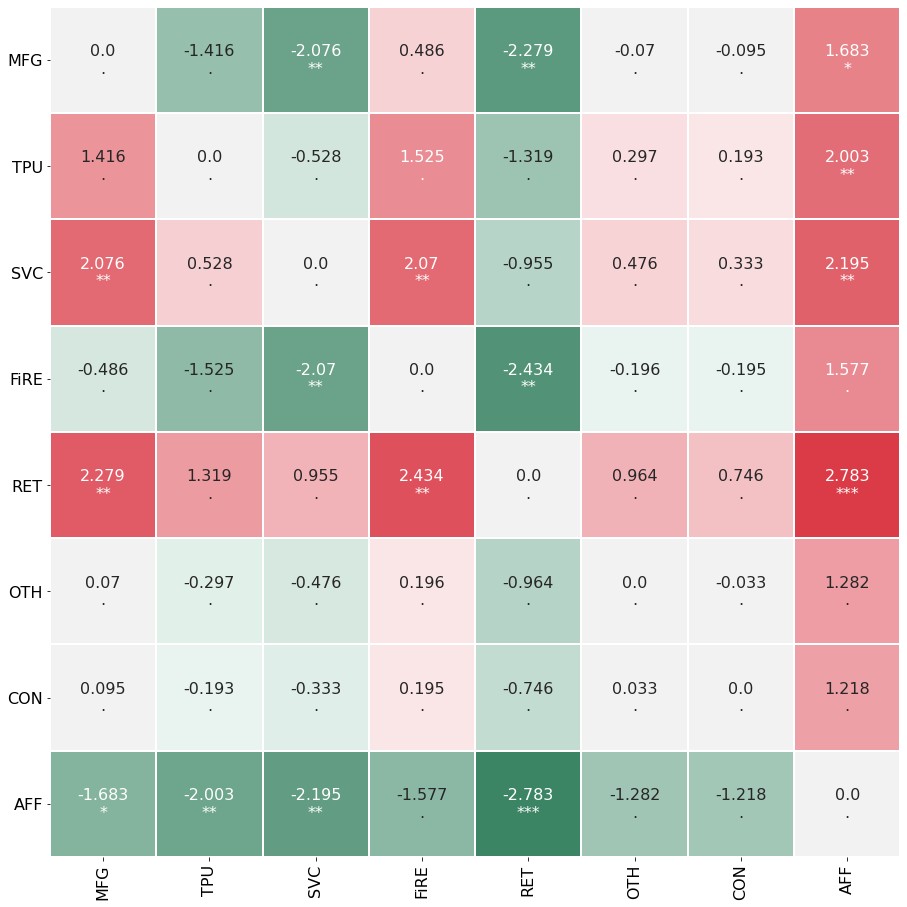

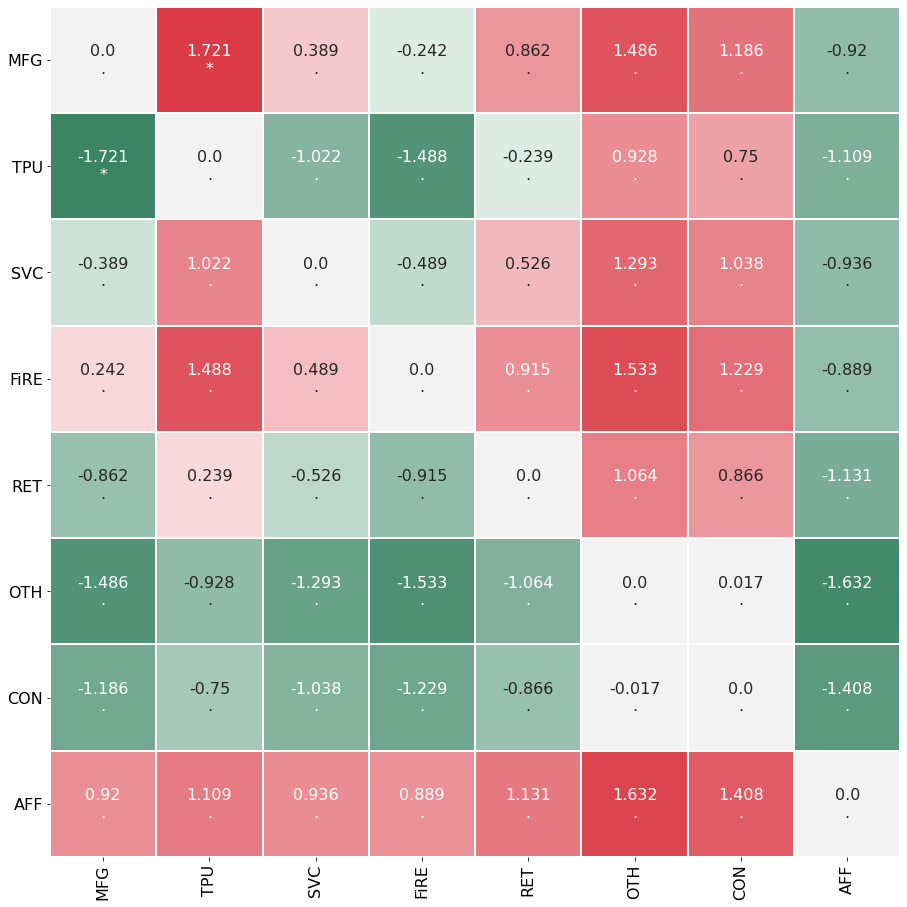

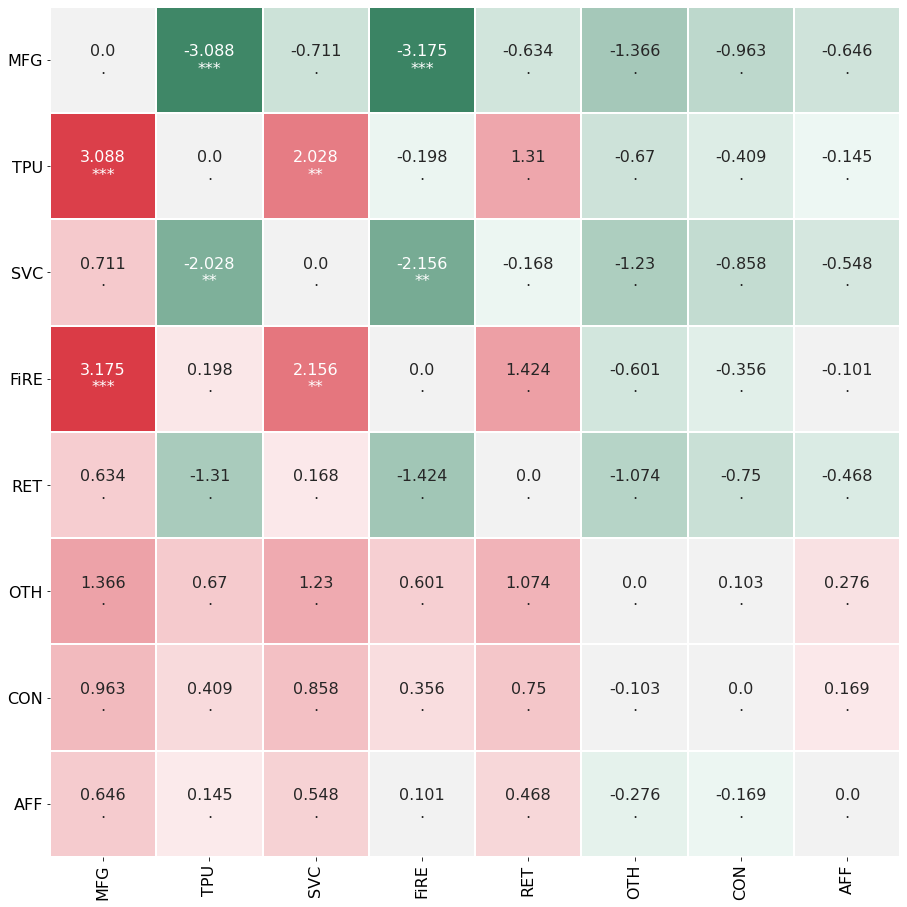

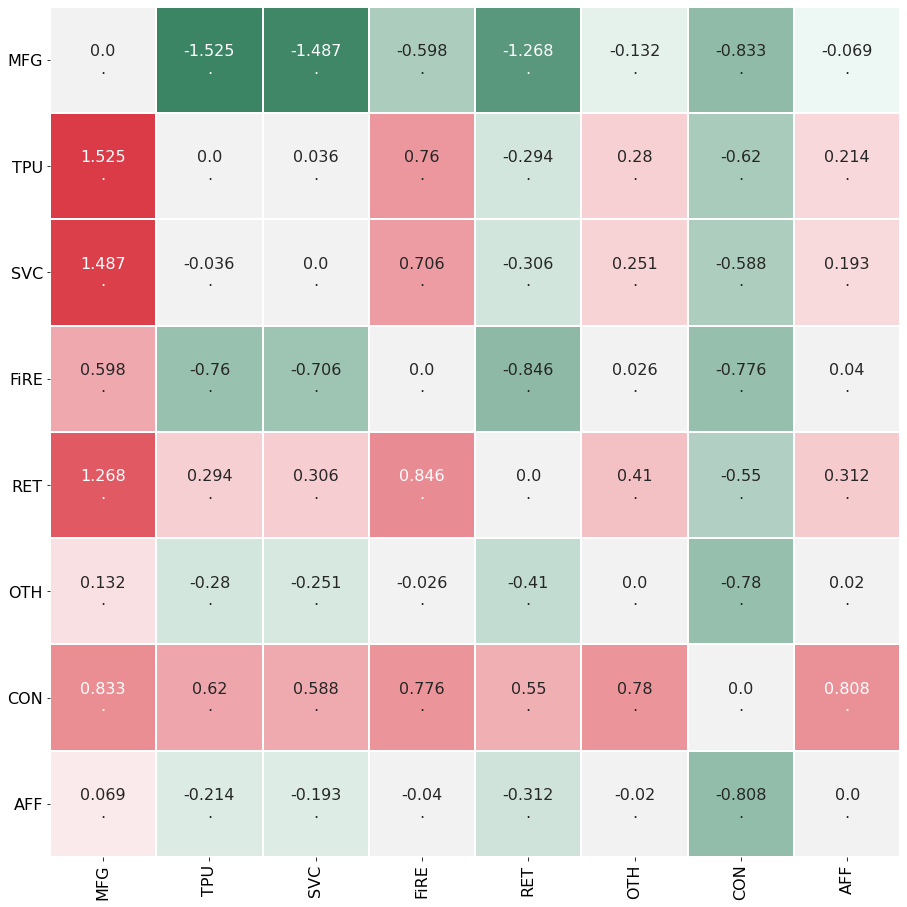

In [11]:
noOfTopics = 0
#dfcolumns = ['Sectors','Manufacturing', 'Transportation', 'Services', 'Finance', 'Retail', 'Others', 'Construction', 'Agriculture']
#dfcolumns = ['Sectors','Manufacturing', 'Transportation and Public Utilities', 'Services', 'Finance Insurance Real Estate', 'Retail Trade', 'Others', 'Construction', 'Agriculture Forestry Fishing']

dfcolumns = ['Sectors','MFG', 'TPU', 'SVC', 'FiRE', 'RET', 'OTH', 'CON', 'AFF']

dictTwo = {'topic0': 'relationships with colleagues and bosses',
'topic1': 'satisfaction with work and colleagues', 'topic2': 'work hours', 'topic3': 'great education',
'topic4': 'gender diversity', 'topic5': 'cultural diversity',
'topic6': 'overtime, job pressure',
'topic7': 'work life balance', 'topic8': 'women empowerment', 'topic9': 'appreciation of experience', 
'topic10': 'age diversity', 'topic11': 'cohesion among colleagues', 
'topic13': 'cohesion among new colleagues', 'topic14': 'fun environment',
'topic15': 'young team', 'topic16': 'communication in the organisation', 
'topic17': 'work from home', 'topic18': 'bad salary', 
'topic19': 'tasks at work', 'topic21': 'female leaders'}

#Agriculture Forestry Fishing,Construction,Finance Insurance Real Estate,Manufacturing,Others,Retail Trade,Services,Transportation and Public Utilities

x_axis_labels = dfcolumns[1:] 
y_axis_labels = dfcolumns[1:]


listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#listOfDataframe = [df_Manufacturing, df_Transportation,df_Services]

for name in df_Manufacturing.loc[:,'topic0':'topic22']:
    if 'topic' in name:
        noOfTopics +=1
print("no of topics ::", noOfTopics)

for c in range(noOfTopics):
    print('====================New CSV==================')
    print(c)
    if c not in [12,20,22]:
        topic_num = 'topic' + str(c)
        #print("topic number::", topic_num)
        dft_testScore = pd.DataFrame(columns = dfcolumns)
        dft_PeeScore = pd.DataFrame(columns = dfcolumns)
        dft_StarScore = pd.DataFrame(columns = dfcolumns)
        count_ = 1
        for j in (listOfDataframe):
            #print("j value ::", j)
            #count12312 = 0
            rowStat =[]
            rowStat.append(dfcolumns[count_])
            rowPval =[]
            rowPval.append(dfcolumns[count_])
            rowStarval = []
            rowStarval.append(dfcolumns[count_])
            for m in listOfDataframe:
                #print("m value ::", m)
                #print(j[topic_num])
                #if (m == j):   
                arr_df_outerSectore = j[topic_num].to_numpy()
                #print("j head::", j.head(5))
                arr_df_innerSector = m[topic_num].to_numpy()
                # Use scipy.stats.ttest_ind_from_stats.
                #print("===========outersector=========")
                #print(arr_df_outerSectore)
                np.savetxt("outer.csv", arr_df_outerSectore, delimiter=",")
                #print("===========innersector=========")
                #print(arr_df_innerSector)
                np.savetxt("inner.csv", arr_df_innerSector, delimiter=",")
                t_testScore = stats.ttest_ind(arr_df_outerSectore, arr_df_innerSector)
                Starval = starTeller(t_testScore.pvalue)
               # print("statistic value ::==================",t_testScore.statistic)
                rowStat.append(t_testScore.statistic)
                rowPval.append(t_testScore.pvalue)
                rowStarval.append(Starval)
            count_ = count_ + 1
            a_series = pd.Series(rowStat, index = dft_testScore.columns)
            b_series = pd.Series(rowPval, index = dft_testScore.columns)
            c_series = pd.Series(rowStarval, index = dft_testScore.columns)
            dft_testScore = dft_testScore.append(a_series, ignore_index=True)
            dft_PeeScore = dft_PeeScore.append(b_series, ignore_index=True)
            dft_StarScore = dft_StarScore.append(c_series, ignore_index=True)
        #dft_testScore.to_excel("T_attempt3_testScore_topic" + str(c) + ".xlsx")
        plt.rcParams.update({'font.size': 16}) #font size 
        listA = [dft_testScore.values.T.tolist()[i] for i in range(1, len(dft_testScore.values.T.tolist()))]
        listB = [dft_PeeScore.values.T.tolist()[i] for i in range(1, len(dft_PeeScore.values.T.tolist()))]
        listC = [dft_StarScore.values.T.tolist()[i] for i in range(1, len(dft_StarScore.values.T.tolist()))]

        for i in range(len(listA)):
            for j in range(len(listA[i])):
                #listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(round(listB[i][j], 3))+'\n'+str(listC[i][j])
                listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(listC[i][j])

        #fig, ax = plt.subplots(figsize=(18/2.54, 11.83/2.54))
        #fig = plt.figure(figsize=(18/2.54,10.45/2.54)) #dt2
        fig = plt.figure(figsize=(40/2.54,40/2.54)) #dt2
        
        #ax = fig.add_axes([0.05,0.07,0.93,0.9])
        ax = fig.add_axes([0.25, 0.25, 0.75, 0.75])
        cmap = sns.diverging_palette(150, 10, as_cmap=True)
        #hmap = sns.heatmap(listA, cmap=cmap, linewidths=1, annot=listC, cbar = False, square =False, ax = ax, annot_kws={"size": 10})
        hmap = sns.heatmap(listA, cmap=cmap, linewidths=1, annot=listC, cbar = False, square =False, annot_kws={"size": 16}, xticklabels=x_axis_labels, yticklabels=y_axis_labels) # ax = ax
        hmap.set_yticklabels(y_axis_labels, rotation=0)
        hmap.set_xticklabels(x_axis_labels, rotation=90)
        plt.savefig("heatmap_dataset2_" +  dictTwo[topic_num] + ".png")
        dft_testScore.set_index('Sectors', inplace=True)
        dft_testScore.to_excel("dataset1_t_test_Star" + str(c) + ".xlsx")
                
            
